In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from GWSAT import GWSAT

In [7]:
fileName = r"uf20-01.cnf"
executions = 30
restarts = 10
iteractions = 1000
wp = 0.4
wps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iterationList = [10, 100, 1000, 2000, 5000, 10000]
restartsList = [1, 5, 10, 20, 30, 40]
iterationsToSolve = {}
iterations = {}
files = ['uf20-01.cnf','uf20-02.cnf' ]
GWSATOutputs = []

In [4]:
for wp in wps:
    print(wp)
    c1 = GWSAT(fileName, executions, restarts, iteractions, wp )
    output = c1.start()[0]
    o = output[output[:,0] == 1][:,2]
    iterationsToSolve[wp] = o.mean()

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [5]:
iterationsToSolve

{0.1: 385.6666666666667,
 0.2: 406.0,
 0.3: 436.43333333333334,
 0.4: 413.9,
 0.5: 370.46666666666664,
 0.6: 387.2,
 0.7: 313.0,
 0.8: 449.7,
 0.9: 334.6333333333333}

In [6]:
accuraciesFrame = pd.DataFrame(iterationsToSolve, index=['iterations']).T
#accuraciesFrame.sort_values(by=["wp"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

iterations
0.1  384.666667
0.2  405.000000
0.3  435.433333
0.4  412.900000
0.5  369.466667
0.6  386.200000
0.7  312.000000
0.8  448.700000
0.9  333.633333

Text(0, 0.5, 'Iterations to solve')

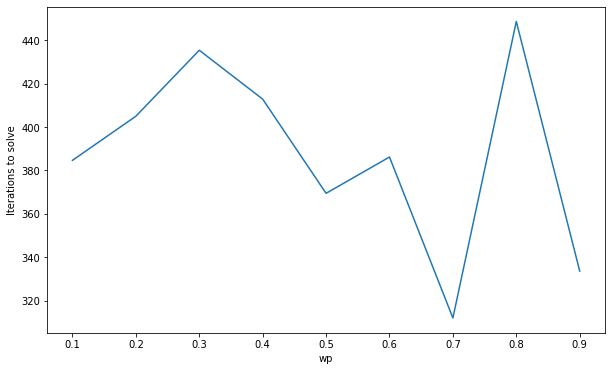

In [7]:
plt.figure(figsize=(10,6))
data = np.array(iterationsToSolve)
plt.plot(accuraciesFrame)
plt.xlabel('wp')
plt.ylabel('Iterations to solve')

In [11]:
iterations = {}

for i in iterationList:
    print(i)
    c1 = GWSAT(fileName, executions, restarts, i, wp )
    output = c1.start()[0]
    outcomes = output[:,0]
    trueOutcomes = outcomes.sum()
    if trueOutcomes == 0:
        successRate = 0
    else:
        successRate =  trueOutcomes / (len(outcomes))
    iterations[i] = successRate

10
100
1000
2000
5000
10000


In [12]:
iterations

{10: 0.025925925925925925,
 100: 0.11442786069651742,
 1000: 0.5454545454545454,
 2000: 0.8823529411764706,
 5000: 1.0,
 10000: 1.0}

Text(0, 0.5, 'Success rate')

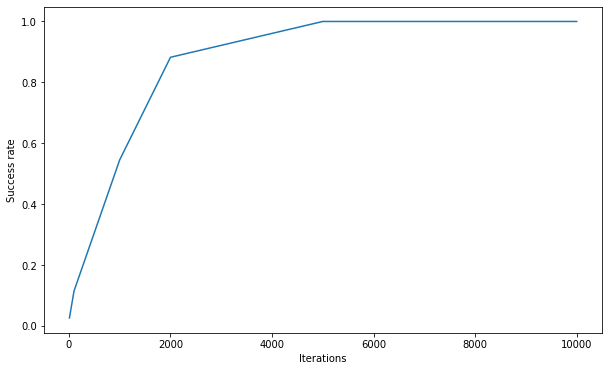

In [16]:
plt.figure(figsize=(10,6))
data = np.array(iterations)
plt.plot(pd.DataFrame(iterations, index=['iterations']).T)
plt.xlabel('Iterations')
plt.ylabel('Success rate')

In [18]:
iterations = {}

for i in restartsList:
    print(i)
    c1 = GWSAT(fileName, executions, i, iteractions, wp )
    output = c1.start()[0]
    outcomes = output[:,0]
    trueOutcomes = outcomes.sum()
    if trueOutcomes == 0:
        successRate = 0
    else:
        successRate =  trueOutcomes / (len(outcomes))
    iterations[i] = successRate

1
5
10
20
30
40


Text(0, 0.5, 'Success rate')

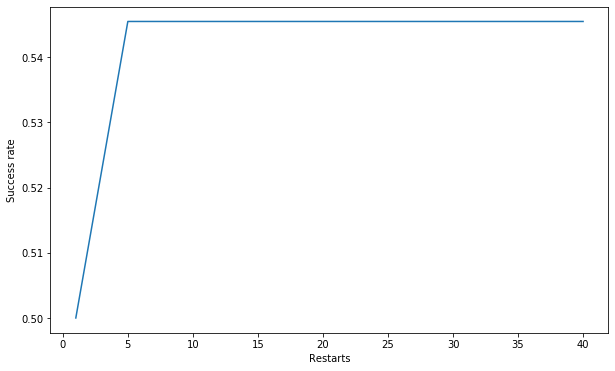

In [19]:
plt.figure(figsize=(10,6))
data = np.array(iterations)
plt.plot(pd.DataFrame(iterations, index=['iterations']).T)
plt.xlabel('Restarts')
plt.ylabel('Success rate')

In [9]:
for f in files:
    print(f)
    c1 = GWSAT(f, executions, restarts, iteractions, wp )
    output = c1.start()[0]
    o = output[output[:,0] == 1][:,2]
    GWSATOutputs.append(o)

uf20-01.cnf
uf20-02.cnf


KeyboardInterrupt: 